PRACTICAL LECTURE 5



Convolutions Neural Networks

1. Import the librariries and set the parameters

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy

In [2]:
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)


def plot_data(X, y, d=0, auto=False, zoom=1):
    X = X.cpu()
    y = y.cpu()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True: plt.axis('equal')
    plt.axis('off')

    _m, _c = 0, '.15'
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)


def plot_model(X, y, model):
    model.cpu()
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    with torch.no_grad():
        data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
        Z = model(data).detach()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)

2. Load the Dataset (MNIST) using PyTorch DataLoader utilities and visualize some images :


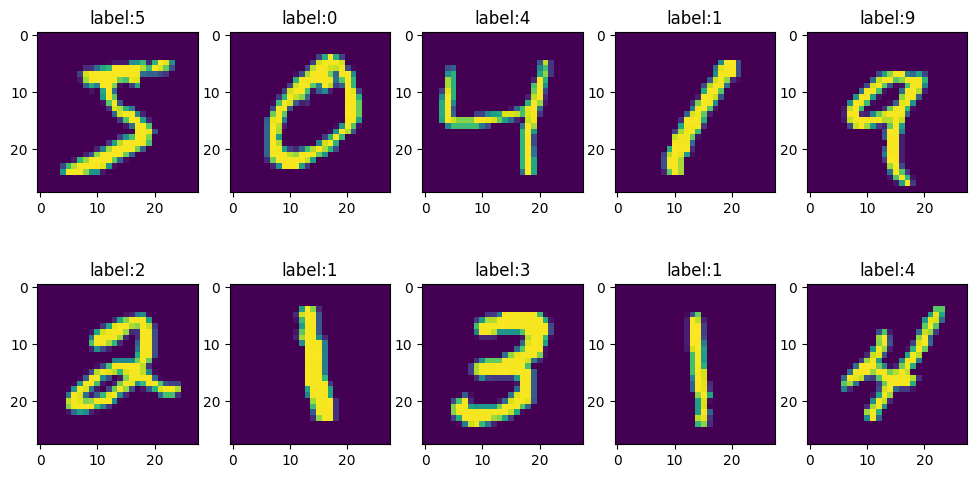

In [3]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = MNIST('./data', transform=img_transform, download=True)
y=dataset.targets
X=dataset.data
#plot_data(X,y)
fig, ax = plt.subplots(2,5,figsize=(12,6))

for i, axi in enumerate(ax.flat):
    axi.imshow(X[i])
    axi.set_title(f'label:{y[i]}')

3. Create the model classes




In [4]:
class FullyConnected(nn.Module):
    def __init__(self):
        super(FullyConnected,self).__init__()
        self.layers=nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,10)
        )
    def forward(self,x):
        x=self.layers(x)
        return x
    
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        self.conv=nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.linear=nn.Sequential(
            nn.Linear(32*7*7,256),
            nn.ReLU(),
            nn.Linear(256,10)
        )

    def forward(self,x):
        x=self.conv(x)
        x=torch.flatten(x,1)
        x=self.linear(x)
        return x

4. Run on a GPU: device string

Switching between CPU and GPU in PyTorch is controlled via a device string, which will seemlessly determine whether GPU is available, falling back to CPU if not:

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

5. Train a small fully-connected network

In [6]:
batch_size=10
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
model1=FullyConnected()
model2=ConvNet()
criterion=nn.CrossEntropyLoss()
optimier1=optim.SGD(model1.parameters(),lr=1e-3)
optimiser2=optim.SGD(model2.parameters(),1e-3)


6. Train a ConvNet with the same number of parameters

In [7]:
num_epoch=20
for epoch in range(num_epoch):
    for i,data in enumerate(dataloader,0):
        img,label=data
        img.to(device)
        img = img.view(img.size(0), -1)
        output=torch.tensor(model1(img),dtype=float,requires_grad=True)
        #label=torch.tensor(label,dtype=float)
        loss=criterion(output,label)
        optimier1.zero_grad()
        loss.backward()
        optimier1.step()

        print(f'epoch [{epoch + 1}/{num_epoch}], loss:{loss.item():.4f}')

/tmp/ipykernel_117822/29340591.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output=torch.tensor(model1(img),dtype=float,requires_grad=True)


epoch [1/20], loss:2.3712
epoch [1/20], loss:2.2871
epoch [1/20], loss:2.2738
epoch [1/20], loss:2.1910
epoch [1/20], loss:2.3753
epoch [1/20], loss:2.2545
epoch [1/20], loss:2.3483
epoch [1/20], loss:2.2611
epoch [1/20], loss:2.3211
epoch [1/20], loss:2.2967
epoch [1/20], loss:2.3230
epoch [1/20], loss:2.2510
epoch [1/20], loss:2.2950
epoch [1/20], loss:2.2497
epoch [1/20], loss:2.2538
epoch [1/20], loss:2.2835
epoch [1/20], loss:2.2898
epoch [1/20], loss:2.2909
epoch [1/20], loss:2.2577
epoch [1/20], loss:2.2742
epoch [1/20], loss:2.2599
epoch [1/20], loss:2.3288
epoch [1/20], loss:2.3135
epoch [1/20], loss:2.3486
epoch [1/20], loss:2.2692
epoch [1/20], loss:2.2858
epoch [1/20], loss:2.2444
epoch [1/20], loss:2.3231
epoch [1/20], loss:2.2793
epoch [1/20], loss:2.3172
epoch [1/20], loss:2.3057
epoch [1/20], loss:2.2722
epoch [1/20], loss:2.2999
epoch [1/20], loss:2.3381
epoch [1/20], loss:2.2479
epoch [1/20], loss:2.2996
epoch [1/20], loss:2.3180
epoch [1/20], loss:2.2488
epoch [1/20]

7. Changes the parameters oof the model.

8. Analyze the results and the impact of these paremeters.